<a href="https://colab.research.google.com/github/hemangi2204/Data_science/blob/main/Copy_of_Case_Studt_2_Bank_cvs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Data Manipulation Library
import pandas as pd
import numpy as np
# Importing Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
# Import FilterWarnings Library
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Data Using Pandas Function

df = pd.read_csv('bank.csv',sep =',')
# Shuffle 100 % Dataset
df.sample(frac = 1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1322,38,blue-collar,married,secondary,no,2008,yes,no,cellular,18,nov,354,1,-1,0,unknown,no
1978,54,blue-collar,married,unknown,no,310,yes,no,telephone,28,jan,526,4,258,3,other,no
2950,37,entrepreneur,married,tertiary,no,836,yes,no,unknown,27,may,129,2,-1,0,unknown,no
3258,38,services,married,secondary,no,0,yes,no,telephone,28,jul,121,2,-1,0,unknown,no
1558,29,admin.,single,secondary,no,3432,yes,no,cellular,17,apr,139,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3997,43,technician,married,secondary,no,275,no,no,cellular,25,aug,69,6,-1,0,unknown,no
1622,45,blue-collar,single,primary,yes,-183,no,yes,cellular,15,jul,395,4,-1,0,unknown,no
2053,24,technician,single,secondary,no,-46,yes,no,unknown,19,may,23,1,-1,0,unknown,no
2637,44,self-employed,married,secondary,no,313,no,no,cellular,6,aug,211,4,-1,0,unknown,no


In [3]:
# Problem Definition:
'''
This Dataset belong to Portugal Bank Telemarketing. Where our aim isn to predict
whether the client will subscribe a term deposit or not.Hence 'y' will be act as
target column or dependent column whereas other columns are independent columns.

x = independent columns
y = dependent column/ target column
'''

# checking dataset information :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


'\nThe following Graph Shows, we dont have any missing values present in any of the\ncolumn\n'

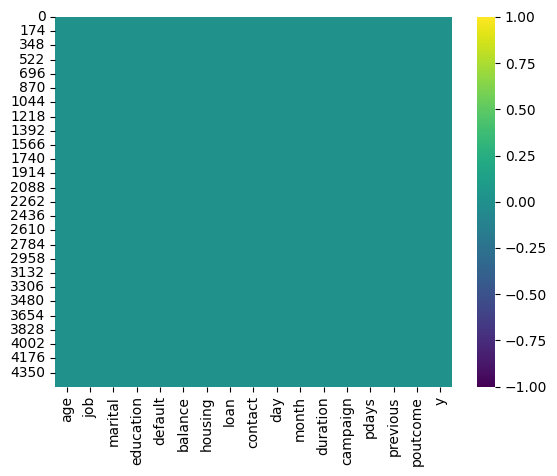

In [4]:
# Checking Null values Present in Dataset:
#df.isnull().sum()
sns.heatmap(df.isnull(),cmap = 'viridis',vmin = -1,vmax = 1,center =0)

'''
The following Graph Shows, we dont have any missing values present in any of the
column
'''

<Axes: >

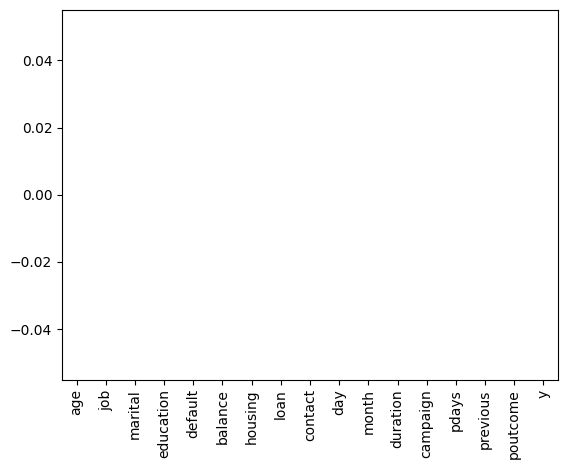

In [5]:
df.isnull().sum().plot(kind = 'bar',cmap = 'viridis')

In [6]:
# Split the Dataset into Categorical and Numerical

categorical_col = df.select_dtypes(include = 'object')
categorical_col

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,unknown,no
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown,no
4518,technician,married,secondary,no,no,no,cellular,aug,unknown,no
4519,blue-collar,married,secondary,no,no,no,cellular,feb,other,no


In [7]:
numerical_col = df.select_dtypes(exclude = 'object')
numerical_col

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


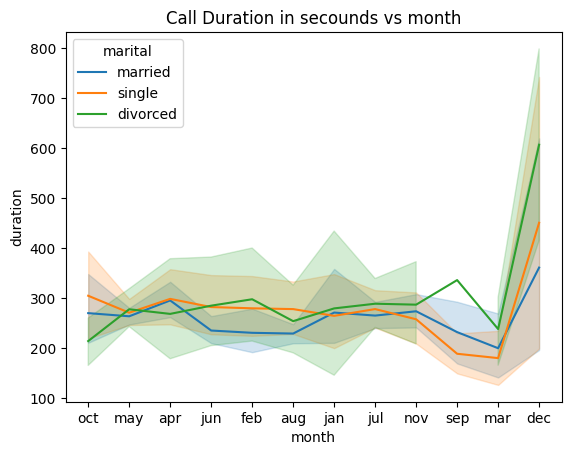

In [8]:
sns.lineplot(x = df['month'],y = df['duration'],c = 'red',hue = df['marital'])
plt.title('Call Duration in secounds vs month')
plt.show()

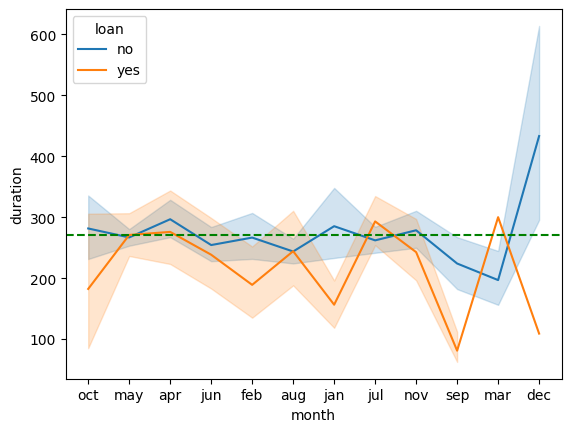

In [9]:
sns.lineplot(x = df['month'],y = df['duration'],hue = df['loan'])
plt.axhline(270,linestyle = '--',color ='green')

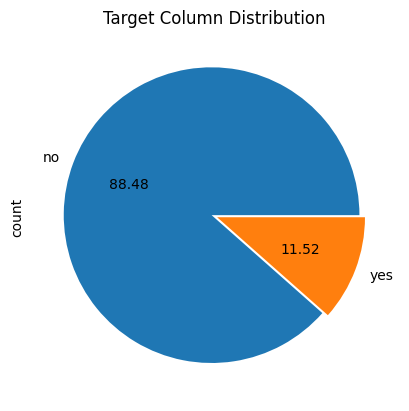

In [10]:
df['y'].value_counts().plot(kind = 'pie',autopct = '%1.2F',explode =[0.02,0.02])
plt.title('Target Column Distribution')
plt.show()

<Axes: ylabel='count'>

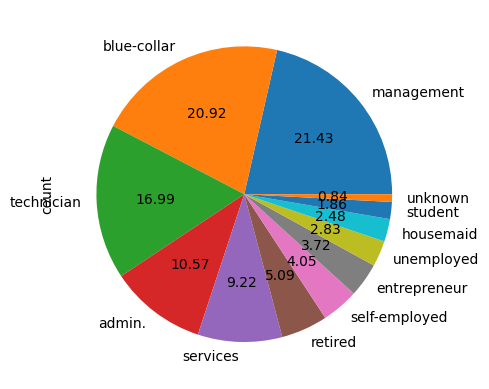

In [11]:
df['job'].value_counts().plot(kind = 'pie',autopct = '%1.2f')


In [12]:
management_job = df[(df['job'] == 'management') & (df['y'] == 'yes')]

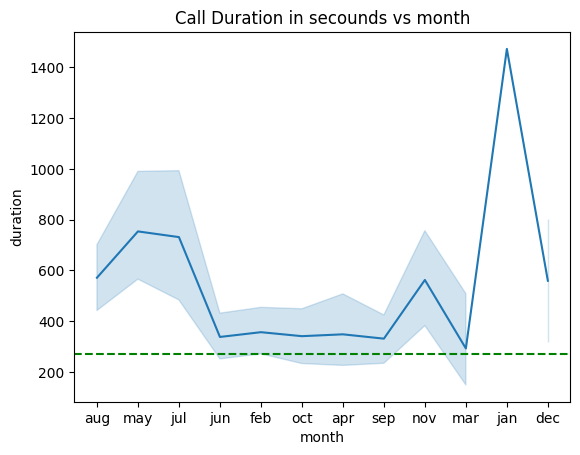

In [13]:
sns.lineplot(x = management_job['month'],y = management_job['duration'])
plt.axhline(270,linestyle = '--',color ='green')
plt.title('Call Duration in secounds vs month')
plt.show()

In [14]:
admin_job = df[(df['job'] == 'admin.') & (df['y'] == 'yes')]

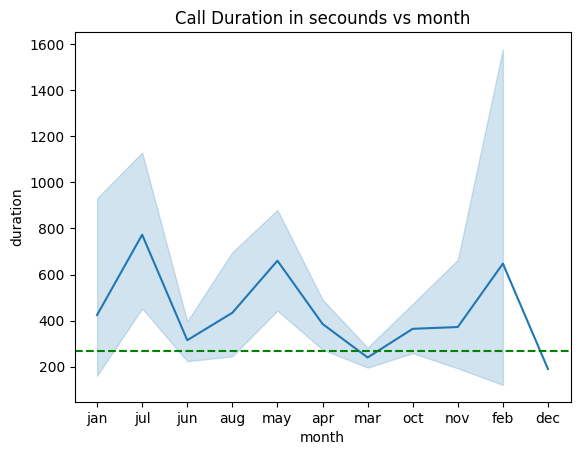

In [15]:
sns.lineplot(x = admin_job['month'],y = admin_job['duration'])
plt.axhline(270,linestyle = '--',color ='green')
plt.title('Call Duration in secounds vs month')
plt.show()

In [16]:
bluecollar_job = df[(df['job'] == 'blue-collar') & (df['y'] == 'yes')]

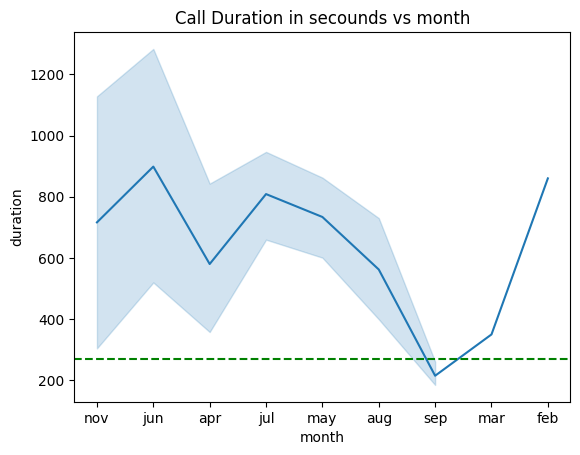

In [17]:
sns.lineplot(x = bluecollar_job['month'],y = bluecollar_job['duration'])
plt.axhline(270,linestyle = '--',color ='green')
plt.title('Call Duration in secounds vs month')
plt.show()

In [18]:
services_job = df[(df['job'] == 'services') & (df['y'] == 'yes')]

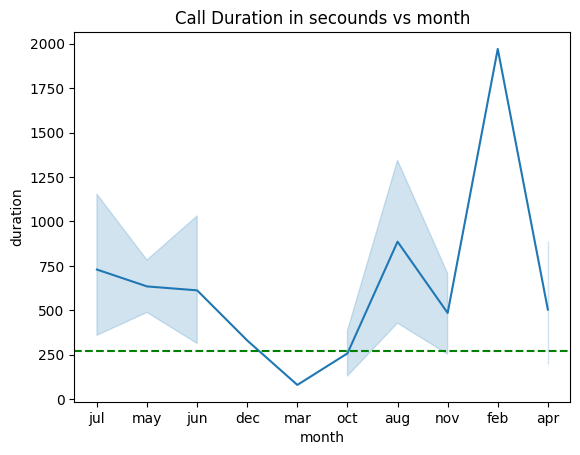

In [19]:
sns.lineplot(x = services_job['month'],y = services_job['duration'])
plt.axhline(270,linestyle = '--',color ='green')
plt.title('Call Duration in secounds vs month')
plt.show()

In [20]:
technician_job = df[(df['job'] == 'technician') & (df['y'] == 'yes')]

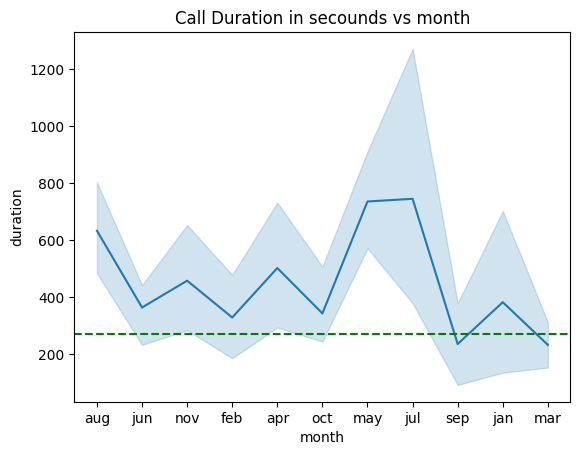

In [21]:
sns.lineplot(x = technician_job['month'],y = technician_job['duration'])
plt.axhline(270,linestyle = '--',color ='green')
plt.title('Call Duration in secounds vs month')
plt.show()

In [22]:
df[df['job'] == 'admin.'].agg(['mode'])

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode
0,34.0,admin.,married,secondary,no,0.0,yes,no,cellular,20.0,may,77,1.0,-1.0,0.0,unknown,no
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,NaN,NaN,NaN,NaN,NaN


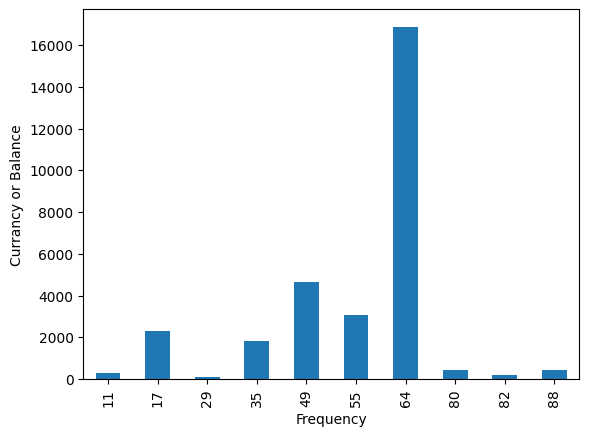

In [23]:
df[df['job'] == 'admin.']['balance'][:10].plot(kind = 'bar')
plt.xlabel('Frequency')
plt.ylabel('Currancy or Balance')
plt.show()

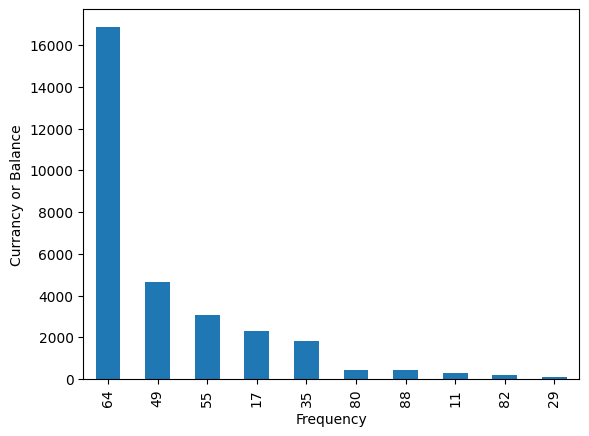

In [24]:
df[df['job'] == 'admin.']['balance'][:10].sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Frequency')
plt.ylabel('Currancy or Balance')
plt.show()

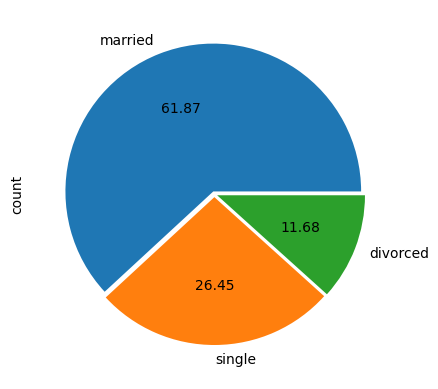

In [25]:
df['marital'].value_counts().plot(kind = 'pie',autopct = '%1.2f',explode =[0.02,0.02,0.02])
plt.show()

In [26]:
divorced = df[(df['marital'] == 'divorced') & (df['y'] == 'yes')]

<Axes: ylabel='count'>

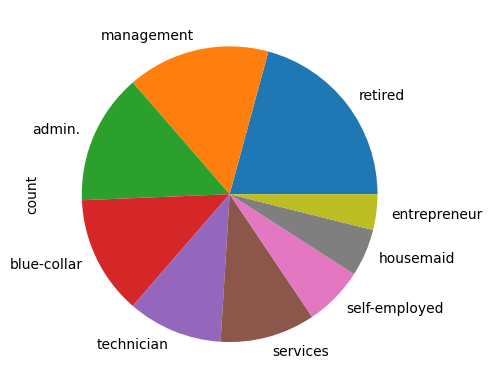

In [27]:
divorced['job'].value_counts().plot(kind = 'pie')

In [28]:
divorced_retired = divorced[divorced['job'] == 'retired']

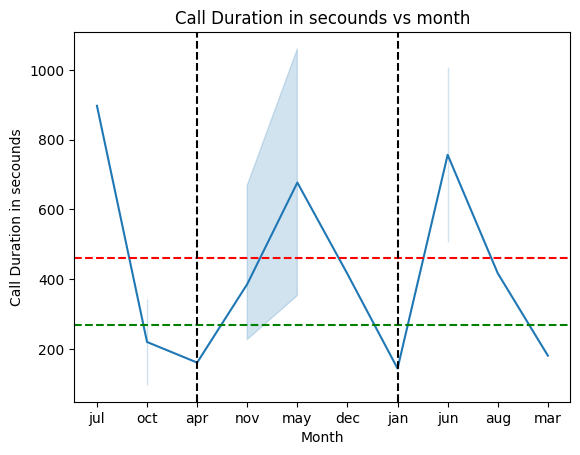

In [29]:
sns.lineplot(x = divorced_retired['month'],y = divorced_retired['duration'])
plt.axhline(270,linestyle = '--',color ='green')
plt.axhline(divorced_retired['duration'].mean(),linestyle = '--',color ='red')
plt.xlabel('Month')
plt.ylabel('Call Duration in secounds')
plt.axvline('apr',linestyle = '--',color ='black')
plt.axvline('jan',linestyle = '--',color ='black')
plt.title('Call Duration in secounds vs month')
plt.show()

In [30]:
divorced_admin = divorced[divorced['job'] == 'admin.']

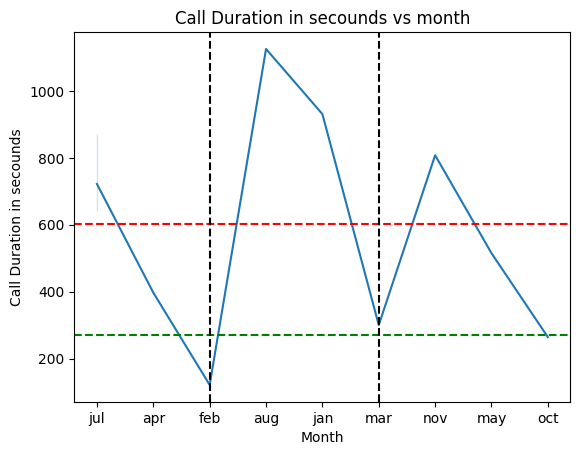

In [31]:
sns.lineplot(x = divorced_admin['month'],y = divorced_admin['duration'])
plt.axhline(270,linestyle = '--',color ='green')
plt.axhline(divorced_admin['duration'].mean(),linestyle = '--',color ='red')
plt.xlabel('Month')
plt.ylabel('Call Duration in secounds')
plt.axvline('feb',linestyle = '--',color ='black')
plt.axvline('mar',linestyle = '--',color ='black')
plt.title('Call Duration in secounds vs month')
plt.show()

In [32]:
# Univariate Analysis:
'''
Step1: Create a blank list
Step2: Create a dictionary
Srep3: Append list containing disctionary key and value pair
Step4: convert list into dataframe
'''
'''
Note:
If any column in Dataset shows IQR as Zero such column must be dropped from the
dataset.

IQR = Inter Quartile Range : Q3 - Q1


'''
from collections import OrderedDict

stats = []

for i in numerical_col.columns:
    numerical_stats = OrderedDict({
        'Feature':i,
        'Count':df[i].count(),
        'Maximum':df[i].max(),
        'Minimum':df[i].min(),
        'Mean':df[i].mean(),
        'Median':df[i].median(),
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75)-df[i].quantile(0.25),
        'Standard Deviation':df[i].std(),
        'Kurtosis':df[i].kurtosis(),
        'Skewness':df[i].skew()

    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)

report




,Feature,Count,Maximum,Minimum,Mean,Median,Q1,Q3,IQR,Standard Deviation,Kurtosis,Skewness
0,age,4521,87,19,41.170095,39.0,33.0,49.0,16.0,10.576211,0.348775,0.699501
1,balance,4521,71188,-3313,1422.657819,444.0,69.0,1480.0,1411.0,3009.638142,88.390332,6.596431
2,day,4521,31,1,15.915284,16.0,9.0,21.0,12.0,8.247667,-1.039531,0.094627
3,duration,4521,3025,4,263.961292,185.0,104.0,329.0,225.0,259.856633,12.530050,2.772420
4,campaign,4521,50,1,2.793630,2.0,1.0,3.0,2.0,3.109807,37.168920,4.743914
5,pdays,4521,871,-1,39.766645,-1.0,-1.0,-1.0,0.0,100.121124,7.957128,2.717071
6,previous,4521,25,0,0.542579,0.0,0.0,0.0,0.0,1.693562,51.995212,5.875259


In [33]:
# Encoding Technique
'''
Step1: Converting Categorical Columns to Numerical Columns
Srep2: Use Label Encoder or One Hot Encoder

'''

# Create Copy of dataframe: df
data= df.copy()

data = pd.get_dummies(data,drop_first = True,dtype = 'int')
data

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4517,57,-3313,9,153,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4518,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4519,28,1137,6,129,4,211,3,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [34]:
'''
Note:
1.All Indepedent columns are decoded or encoded using concept of label encode or
one hot encoder but target column must be encoded separetly using replace function
or map function.
2. In the above dataset we find that 'y' is acts as target column where as othe
than 'y' column are termed as independent columns.
'''

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])

# Encoding Target Column Separately
df['y'] = df['y'].replace({'yes':1,'no':0})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [35]:
df.drop(columns = ['pdays','previous'],axis = 1,inplace= True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,1,0


In [36]:
df['y'].value_counts()

,count
y,
0,4000
1,521


In [48]:
# 1. Understand Scaling Technique
# 2. Data leackage and how to prevent the same
# 3. How to balance target column : Three statergies
'''
For a Classification / Recommendation

# Step1 : Split the dataset into X and y
          X : Independent Columns
          y : Dependent Column/target column

# Step2 : Use Train Test Split
          Always Split the dataset into Seen and Unseen Data
          Seen Data : Train Data :70 % to 80 %
          Unseen Data : Test Data : 20 % to 30 %
          Test Size must be 0.20 to 0.30

# Step3 : Try Balance the Target Column using imblearn technique
          Imblearn technquies (scikit learn libaray):
          1.Oversmapling Technique
          2.Undersampling Technique

# Step4 : Using scaling Technique:
          Mean != Median : Non Normal Distribution
          mean = median  : Normal Distribution

          Scaling Techniques:
          1.MinMaxScaler: When the dataset is Non Normal Distribution
          2.StandardScaler: when the dataset is Normal Distribution
          3.RobustScaler: When the dataset has more outliers and because of which
          the Machine Learning Model Becomes more Sensative.
'''

#Split the dataset into X and y
from sklearn.model_selection import train_test_split


#Independent Columns
X = df.drop(columns = ['y'],axis = 1)

#Dependent Column/target column
y = df['y']
X


# Step2 : Use Train and Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 42)

# Step3 : Balance Technique : Undersampling Technique
from imblearn.under_sampling import ClusterCentroids,AllKNN
from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN

sampling = SMOTE()

X_train,y_train = sampling.fit_resample(X_train,y_train)

y_train.value_counts()

print(y_train.value_counts()) # Show dataset balanced


# Step4: Using Scaling Technique:
'''
Note:
1. Allways use 'fit_transform' on Training Data Where as use 'Transform' on Test
 Data

#Seen Data :
X_train = scalar.fit_transform(X_train)
#Unseen Data :
X_test = scalar.transform(X_test)
'''

from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

scalar = MinMaxScaler()
#Seen Data
X_train = scalar.fit_transform(X_train)
#Unseen Data
X_test = scalar.transform(X_test)


#Checking
print(X_test.max(),X_test.min())



y
0    2795
1    2795
Name: count, dtype: int64
2.5058924583404916 -0.05383954646967875
